In [6]:
import autograd.numpy as np  
from autograd import grad, elementwise_grad
from sklearn import datasets
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [7]:

#Defining some activation functions and their derivative
def ReLU(z):
    return np.where(z > 0, z, 0)

def ReLU_der(z):
    return np.where(z > 0, 1, 0)
"""
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
"""
def sigmoid(z):
    return 1 / (1 + np.power(np.e, -1.0 * z))

def sigmoid_der(z):
    return sigmoid(z) * (1 - sigmoid(z))

def mse(predict, y_train):
    return np.mean((predict - y_train) ** 2)

def mse_der(predict, y_train):
    return 2 * (predict - y_train) / predict.shape[0]

In [8]:

# He initialization
def create_layers_batch(network_input_size, layer_output_sizes):
    layers = []
    i_size = network_input_size
    for layer_output_size in layer_output_sizes:
        std = np.sqrt(2 / i_size) 
        W = np.random.randn(i_size, layer_output_size) * std  #Making sure the shapes macth
        b = np.zeros(layer_output_size)
        layers.append((W, b))
        i_size = layer_output_size
    return layers

# Update forward/backprop for new W shape (x @ W)
def feed_forward_saver_batch(x, layers, activation_funcs):
    layer_inputs = []
    zs = []
    a = x
    for (W, b), activation_func in zip(layers, activation_funcs):
        layer_inputs.append(a)
        z = a @ W + b
        a = activation_func(z)
        zs.append(z)
    return layer_inputs, zs, a

def feed_forward(x, layers, activation_funcs):
    a = x
    for (W, b), activation_func in zip(layers, activation_funcs):
        z = a @ W + b
        a = activation_func(z)
    return a

#Computing gradients
def backpropagation_batch(x, layers, activation_funcs, y, activation_ders, cost_der=mse_der):
    layer_inputs, zs, predict = feed_forward_saver_batch(x, layers, activation_funcs)
    layer_grads = [() for _ in layers]
    for i in reversed(range(len(layers))):
        layer_input, z, activation_der = layer_inputs[i], zs[i], activation_ders[i]
        if i == len(layers) - 1:
            dC_da = cost_der(predict, y)
        else:
            (W_next, _) = layers[i + 1]
            dC_da = dC_dz @ W_next.T
        dC_dz = dC_da * activation_der(z)
        dC_dW = layer_input.T @ dC_dz
        dC_db = np.sum(dC_dz, axis=0)
        layer_grads[i] = (dC_dW, dC_db)
    return layer_grads


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
data = pd.read_csv(url, sep=';')

X = data
print(X)
X = data.drop('quality', axis=1).values
y = data['quality'].values.astype(float)           # regression target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#STANDARDIZE FEATURES 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)

#Reshape targets to (n_samples, 1)
y_train = y_train.reshape(-1, 1)
y_test  = y_test.reshape(-1, 1)

print(y)
print(y.shape)
print(x_train.shape)
print(y_train.shape)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [10]:
# XGBoost

#!pip install xgboost   # if needed

import xgboost as xgb
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

# Regression
xgbr = xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, subsample=0.8, random_state=42)
xgbr.fit(x_train, y_train.ravel())
pred = xgbr.predict(x_test)
print(f"XGBoost Regression → MSE: {mean_squared_error(y_test, pred):.4f}, R²: {r2_score(y_test, pred):.4f}")

XGBoost Regression → MSE: 0.3503, R²: 0.5477


Epoch 1, Train MSE: 0.7783, Test MSE: 0.7724, R2: 0.0027
Epoch 2, Train MSE: 0.7718, Test MSE: 0.7605, R2: 0.0180
Epoch 3, Train MSE: 0.7686, Test MSE: 0.7552, R2: 0.0249
Epoch 4, Train MSE: 0.7595, Test MSE: 0.7552, R2: 0.0248
Epoch 5, Train MSE: 0.7476, Test MSE: 0.7408, R2: 0.0435
Epoch 6, Train MSE: 0.7448, Test MSE: 0.7404, R2: 0.0440
Epoch 7, Train MSE: 0.7315, Test MSE: 0.7233, R2: 0.0660
Epoch 8, Train MSE: 0.7243, Test MSE: 0.7167, R2: 0.0746
Epoch 9, Train MSE: 0.7406, Test MSE: 0.7399, R2: 0.0446
Epoch 10, Train MSE: 0.7148, Test MSE: 0.7016, R2: 0.0941
Epoch 11, Train MSE: 0.7005, Test MSE: 0.6917, R2: 0.1068
Epoch 12, Train MSE: 0.6936, Test MSE: 0.6831, R2: 0.1180
Epoch 13, Train MSE: 0.6929, Test MSE: 0.6880, R2: 0.1117
Epoch 14, Train MSE: 0.6790, Test MSE: 0.6680, R2: 0.1375
Epoch 15, Train MSE: 0.6706, Test MSE: 0.6605, R2: 0.1471
Epoch 16, Train MSE: 0.6632, Test MSE: 0.6545, R2: 0.1549
Epoch 17, Train MSE: 0.6605, Test MSE: 0.6542, R2: 0.1553
Epoch 18, Train MSE: 0.

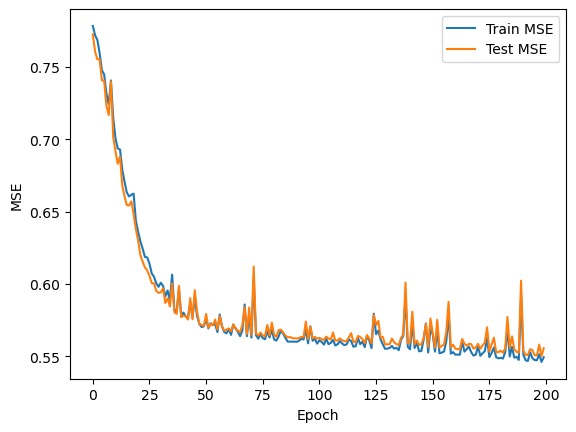

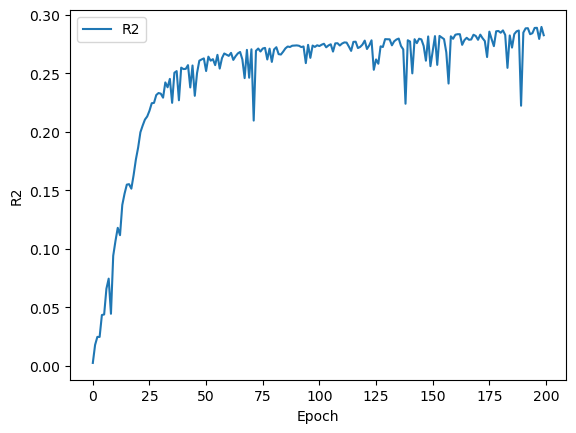

([(array([[-0.18475563,  0.40551151,  0.07979379, ..., -0.52601803,
            0.42612574,  0.53530139],
          [-0.81528017,  0.96793341,  0.10625214, ...,  0.10743485,
            0.58919157, -0.16794501],
          [ 0.31815771, -0.24480528,  0.0032743 , ..., -0.17631593,
           -0.46248237, -0.38160765],
          ...,
          [-0.59311942, -0.01526497, -0.38160759, ...,  0.26909961,
            0.10714727,  0.68364644],
          [ 0.20359438,  0.29773731, -0.04011795, ..., -0.304368  ,
           -0.54707003, -0.24354893],
          [-0.18233375, -0.00599145,  0.4293757 , ..., -0.39445208,
            0.21012088,  0.35521644]]),
   array([-3.41951723e-02,  1.52282008e-02, -3.48087500e-03,  8.34591155e-03,
           3.69477401e-03,  4.23450018e-03, -1.45631312e-02,  2.74538337e-02,
          -3.39654038e-03,  1.84621569e-02, -3.33995804e-02, -6.35690080e-03,
           4.19205450e-03,  1.16782825e-04, -8.80086476e-03, -3.45660767e-02,
          -1.68589883e-02,  7.31331

In [11]:


#activation_funcs = [ReLU, ReLU, ReLU, ReLU, lambda x: x]  # ReLU hidden, linear output
#activation_ders = [ReLU_der, ReLU_der, ReLU_der, lambda x: np.ones_like(x)]

network_input_size = 11

activation_funcs = [sigmoid, sigmoid, sigmoid, lambda x: x]  
activation_ders = [sigmoid_der, sigmoid_der, sigmoid_der, lambda x: np.ones_like(x)]

layer_output_sizes = [128, 64, 32, 1]
learning_rate = 0.01
epochs = 200
train_batch_size = 100  # Add mini-batching

layers = create_layers_batch(network_input_size, layer_output_sizes)

def train_network(x_train, x_test, y_train, y_test, layers, activation_funcs, activation_ders, learning_rate, epochs, batch_size=18):
    train_MSE = []
    test_MSE = []
    R = []
    

    for epoch in range(epochs):
        # Shuffle
        perm = np.random.permutation(x_train.shape[0])
        x_shuffled = x_train[perm]
        y_shuffled = y_train[perm]
        
        # Mini-batch loop
        for start in range(0, x_train.shape[0], batch_size):
            end = min(start + batch_size, x_train.shape[0])
            input_batch = x_shuffled[start:end]
            target_batch = y_shuffled[start:end]
            
            layers_grad = backpropagation_batch(input_batch, layers, activation_funcs, target_batch, activation_ders, cost_der=mse_der)
            for (W, b), (W_g, b_g) in zip(layers, layers_grad):
                W -= learning_rate * W_g
                b -= learning_rate * b_g
        
        #Computing accuracies and predictions
        train_pred = feed_forward(x_train, layers, activation_funcs)
        test_pred = feed_forward(x_test, layers, activation_funcs)
        train_mse = mse(train_pred, y_train)
        test_mse = mse(test_pred, y_test)
        train_MSE.append(train_mse) 
        test_MSE.append(test_mse)
        r2 = 1 - test_mse / np.var(y_test)
        R.append(r2)
        print(f"Epoch {epoch+1}, Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}, R2: {r2:.4f}")

        
    
    # Plot MSE
    plt.plot(train_MSE, label='Train MSE')
    plt.plot(test_MSE, label='Test MSE')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()
    
    # Plot R2
    plt.plot(R, label='R2')
    plt.xlabel('Epoch')
    plt.ylabel('R2')
    plt.legend()
    plt.show()
    
    return layers, train_MSE, test_MSE

train_network(x_train, x_test, y_train, y_test, layers, activation_funcs, activation_ders, learning_rate, epochs, train_batch_size)

In [12]:
"""
#Gradient verification with autograd

verify_grad = backpropagation_batch(x_train, layers, activation_funcs, y_train, activation_ders)
print("Backprop =",verify_grad[-1][0])


#Verify gradients
def cost(x_train, layers, activation_funcs, y_train):
    predict = feed_forward_saver_batch(x_train, layers, activation_funcs)[2]
    return mse(predict, y_train)

cost_grad = grad(cost, 1)
autoG = cost_grad(x_train, layers, activation_funcs, y_train)

print("Autograd =",autoG)
print("Backprop =",verify_grad)

diff = 0
for i in range(len(computed)):
    diff += abs(computed[-1][0][0][i])-abs(autoG[-1][0][0][i])
if diff <= 10**-6:
    print("Same gradients")
"""



'\n#Gradient verification with autograd\n\nverify_grad = backpropagation_batch(x_train, layers, activation_funcs, y_train, activation_ders)\nprint("Backprop =",verify_grad[-1][0])\n\n\n#Verify gradients\ndef cost(x_train, layers, activation_funcs, y_train):\n    predict = feed_forward_saver_batch(x_train, layers, activation_funcs)[2]\n    return mse(predict, y_train)\n\ncost_grad = grad(cost, 1)\nautoG = cost_grad(x_train, layers, activation_funcs, y_train)\n\nprint("Autograd =",autoG)\nprint("Backprop =",verify_grad)\n\ndiff = 0\nfor i in range(len(computed)):\n    diff += abs(computed[-1][0][0][i])-abs(autoG[-1][0][0][i])\nif diff <= 10**-6:\n    print("Same gradients")\n'